In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [74]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Contains null values that needs to be processed

In [76]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [77]:
df.shape

(908, 25)

In [78]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [79]:
#data is highly spread

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [81]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [82]:
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_cols.append(i)

In [83]:
cat_cols

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [84]:
df['country'].unique()

array(['IND'], dtype=object)

In [85]:
df['country_long'].unique()

array(['India'], dtype=object)

In [86]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000018',
       'IND0000019', 'WRI1019905', 'IND0000020', 'IND0000021',
       'IND0000022', 'IND0000023', 'IND0000025', 'IND0000024',
       'WRI1019941', 'WRI1019882', 'IND0000026', 'IND0000027',
       'IND0000028', 'IND0000029', 'IND0000030', 'IND0000031',
       'IND0000032', 'WRI1019883', 'IND0000033', 'IND0000034',
       'IND0000035', 'IND0000036', 'IND0000037', 'IND00

In [87]:
df['gppd_idnr'].nunique()

908

In [88]:
#df['gdpd_indr'] has all unique numbers we can add column and diff between IND and WRI

In [89]:
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [90]:
df['owner'].value_counts()

Jk Cement ltd                                            4
Acc Acc ltd                                              4
Sterling Agro Industries ltd.                            4
Shree Naman Developers Ltd.                              3
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
                                                        ..
Reliance Power ltd                                       1
Purna Ssk ltd                                            1
Ener-t International Ltd.                                1
Jain Solar                                               1
ACME Solar Energy                                        1
Name: owner, Length: 280, dtype: int64

In [91]:
df['owner'].nunique()

280

In [92]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Manikgarh Manikgarh cement                     1
National And paper                             1
Unity Power Limite r World                     1
Gupta Ltd gepl)                                1
ACME Solar Energy                              1
Name: source, Length: 191, dtype: int64

In [93]:
df['source'].nunique()

191

In [94]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [95]:
df['geolocation_source'].nunique()

3

In [96]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [97]:
df['generation_data_source'].nunique()

1

In [98]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [99]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
for i in ['latitude','longitude','other_fuel1','commissioning_year','owner','geolocation_source','year_of_capacity_data','generation_data_source']:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [100]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,NaN,...,National Renewable Energy Laboratory,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,NaN,...,Industry About,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN


In [101]:
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [102]:
#other fuel 2 and 3 are mostly having NaN so deleting

In [103]:
new=[]
for i in df['gppd_idnr']:
    new.append(i[0:3])

In [104]:
df['gppd_prefix']=new

In [105]:
#Since added gppd_prefix will remove gppd_indr

In [106]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source        0
estimated_generation_gwh    908
gppd_prefix                   0
dtype: int64

In [107]:
df['owner'].nunique()

280

In [108]:
df['geolocation_source'].nunique()

3

In [109]:
df['url'].nunique()

304

In [110]:
df['name'].nunique()

908

In [111]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source        0
estimated_generation_gwh    908
gppd_prefix                   0
dtype: int64

In [112]:
df['year_of_capacity_data']=imp.fit_transform(df['year_of_capacity_data'].values.reshape(-1,1))
for i in ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']:
    df[i]=df[i].replace(np.NaN,0)

In [113]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,gppd_prefix
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,NaN,...,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,IND
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,IND
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,NaN,...,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority,NaN,WRI


In [114]:
#since there is no value in estimated_generation_gwh deleting it
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)

In [115]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2               907
other_fuel3               908
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                   908
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
gppd_prefix                 0
dtype: int64

In [116]:
cat_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

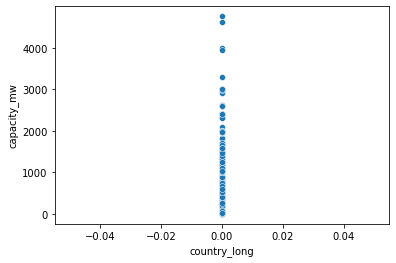

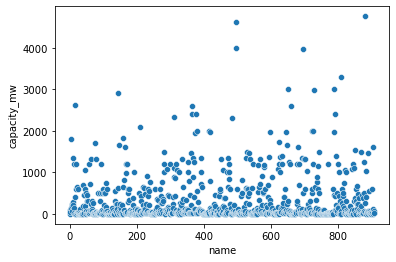

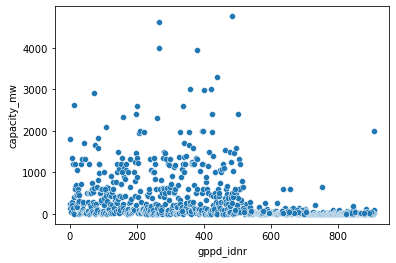

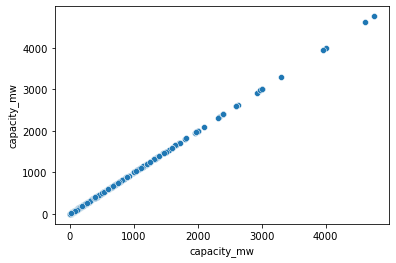

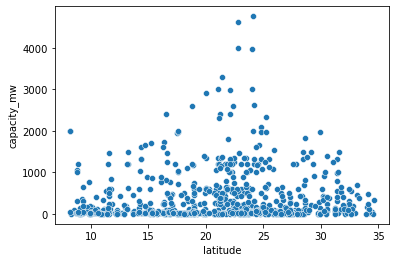

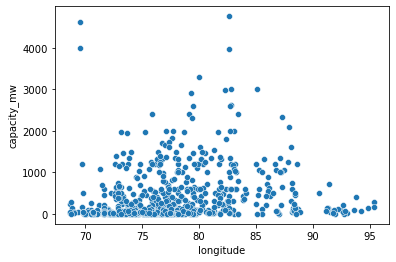

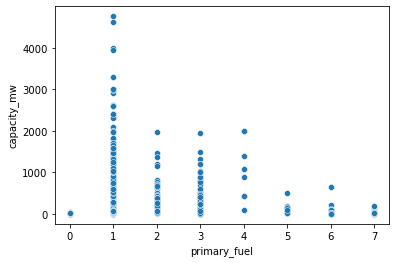

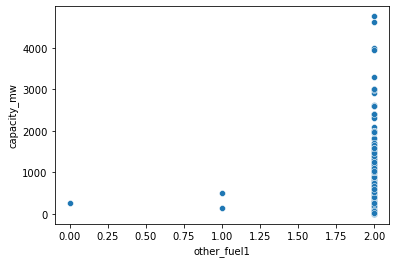

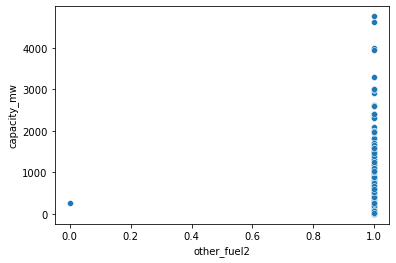

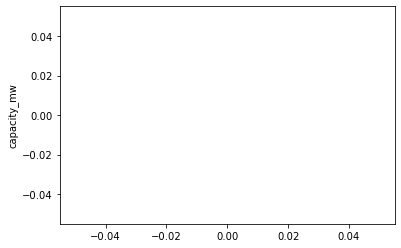

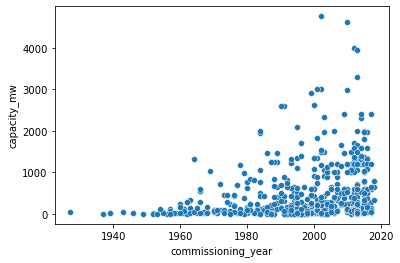

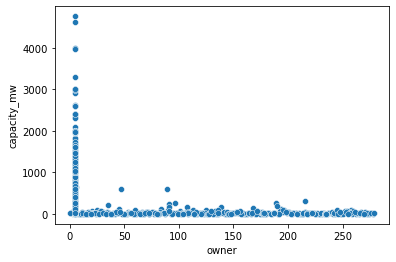

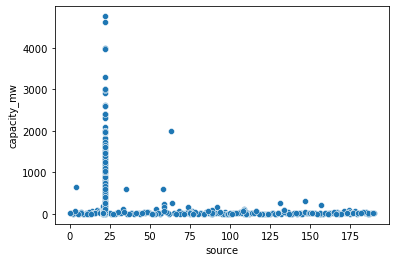

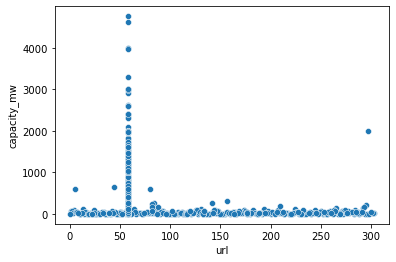

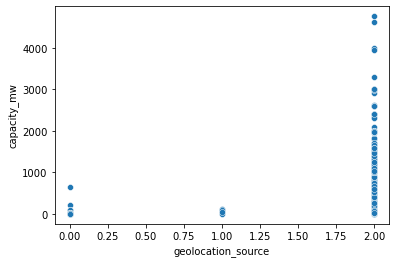

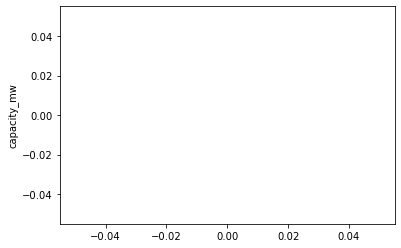

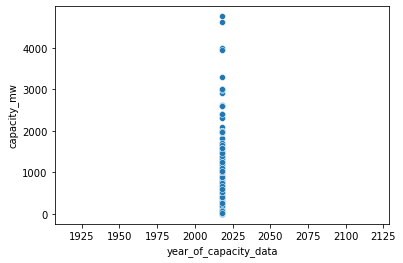

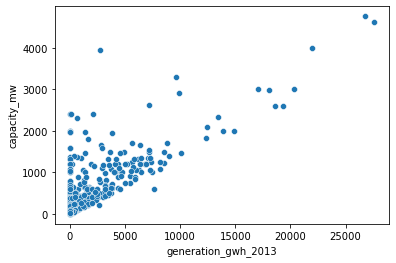

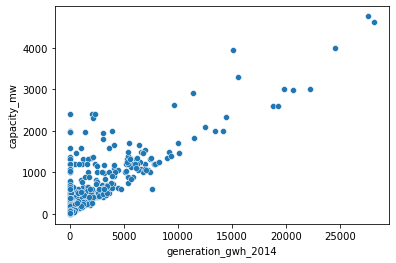

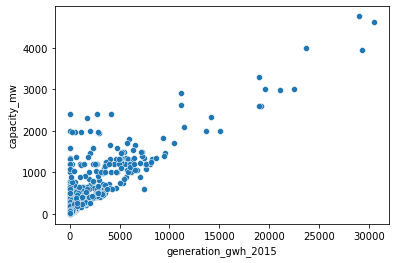

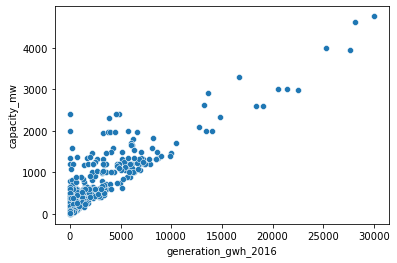

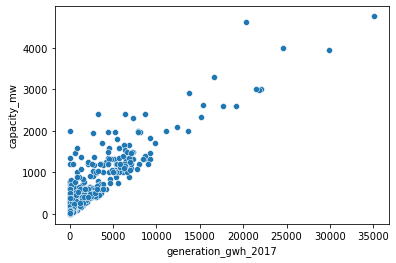

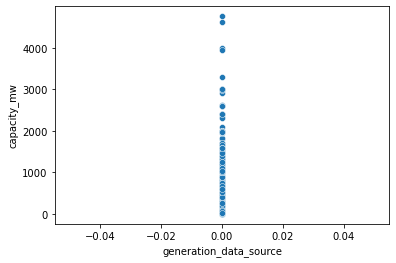

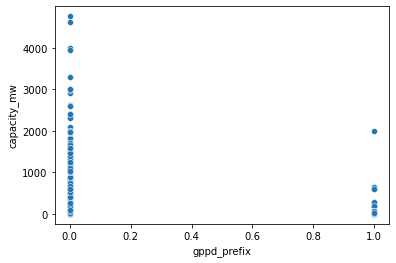

In [118]:
cols=df.columns
for i in cols[1:]:
    sns.scatterplot(x=df[i],y=df['capacity_mw'])
    plt.show()

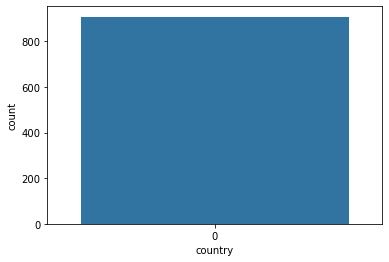

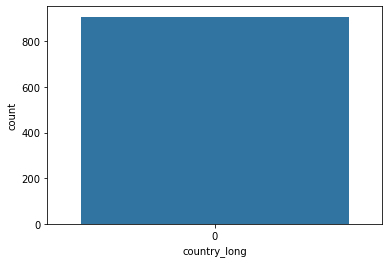

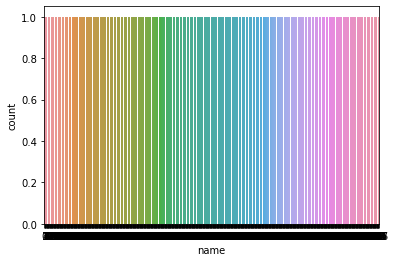

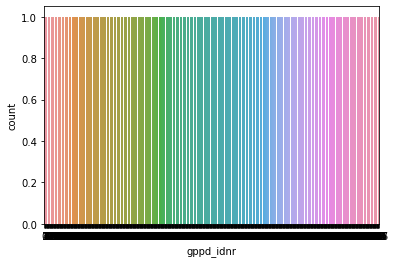

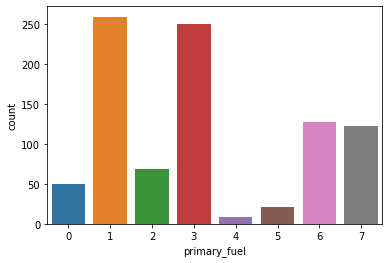

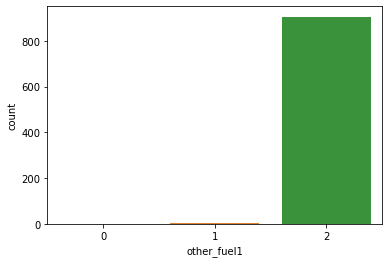

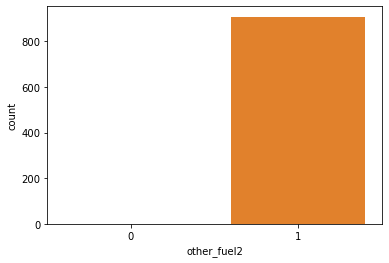

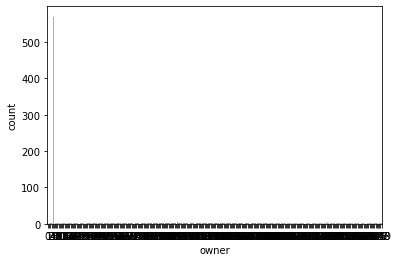

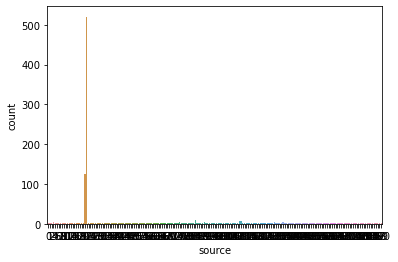

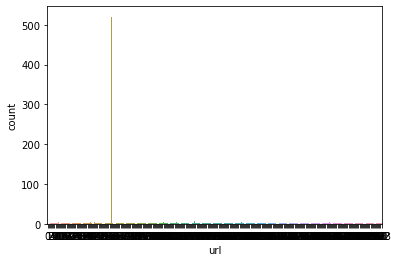

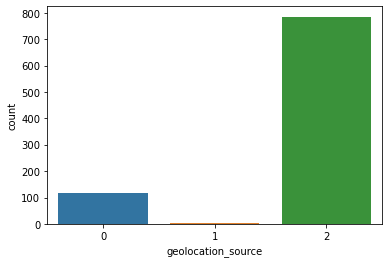

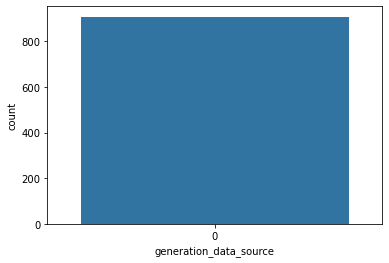

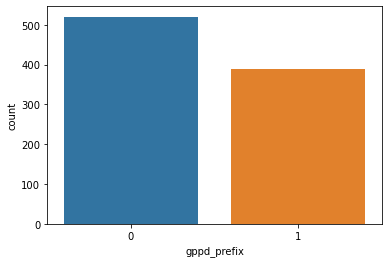

In [120]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

In [119]:
#there is only one value in generation_data_source can be removed,primary fuel is not having equal values hence will use NearMiss

In [121]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,gppd_prefix
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,0.0,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000
mean,0.0,0.0,453.50000,453.50000,321.046378,21.084948,77.156237,3.205947,1.995595,0.998899,...,1.733480,NaN,2018.0,974.403892,1068.918194,1129.934756,1181.024405,1235.206195,0.0,0.427313
std,0.0,0.0,262.26132,262.26132,580.221767,6.107146,4.945215,2.281339,0.081214,0.033186,...,0.676835,NaN,0.0,2716.222621,2924.098882,3103.712012,3129.230619,3185.504866,0.0,0.494961
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,...,0.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.0,0.0,226.75000,226.75000,16.837500,17.057825,73.812975,1.000000,2.000000,1.000000,...,2.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.0,0.0,453.50000,453.50000,60.000000,21.278850,76.492900,3.000000,2.000000,1.000000,...,2.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.0,0.0,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,1.000000,...,2.000000,NaN,2018.0,470.116200,570.095213,605.769975,669.808766,708.134037,0.0,1.000000
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,1.000000,...,2.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0,1.000000


In [122]:
#data is mostly widely spread

In [123]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,gppd_prefix
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.135744,0.010089,0.038752,-0.074643,-0.045414,...,0.035528,NaN,NaN,0.075314,0.079470,0.069114,0.062994,0.065140,NaN,-0.023620
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.107985,-0.375394,0.607373,0.001812,0.001330,...,-0.464119,NaN,NaN,-0.246174,-0.249356,-0.253843,-0.265457,-0.268714,NaN,0.856826
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.057801,0.217022,-0.377783,0.002672,0.003495,...,0.204698,NaN,NaN,0.776258,0.827206,0.853262,0.886996,0.902431,NaN,-0.416879
latitude,NaN,NaN,-0.135744,-0.107985,0.057801,1.000000,0.050511,-0.023407,0.035502,0.032102,...,-0.190605,NaN,NaN,0.067649,0.070407,0.066108,0.059540,0.074320,NaN,-0.078036
longitude,NaN,NaN,0.010089,-0.375394,0.217022,0.050511,1.000000,-0.369505,0.026090,0.003319,...,0.220798,NaN,NaN,0.155235,0.162076,0.175572,0.197305,0.212921,NaN,-0.410972
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.023407,-0.369505,1.000000,0.004902,0.032125,...,-0.482803,NaN,NaN,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809,NaN,0.500012
other_fuel1,NaN,NaN,-0.074643,0.001812,0.002672,0.035502,0.026090,0.004902,1.000000,0.816347,...,-0.021383,NaN,NaN,-0.003067,-0.002986,0.001952,0.006690,0.007839,NaN,0.046881
other_fuel2,NaN,NaN,-0.045414,0.001330,0.003495,0.032102,0.003319,0.032125,0.816347,1.000000,...,-0.013082,NaN,NaN,-0.012896,-0.011423,-0.009626,-0.004352,-0.003290,NaN,0.028682


In [124]:
#2 columns do not have any corelation

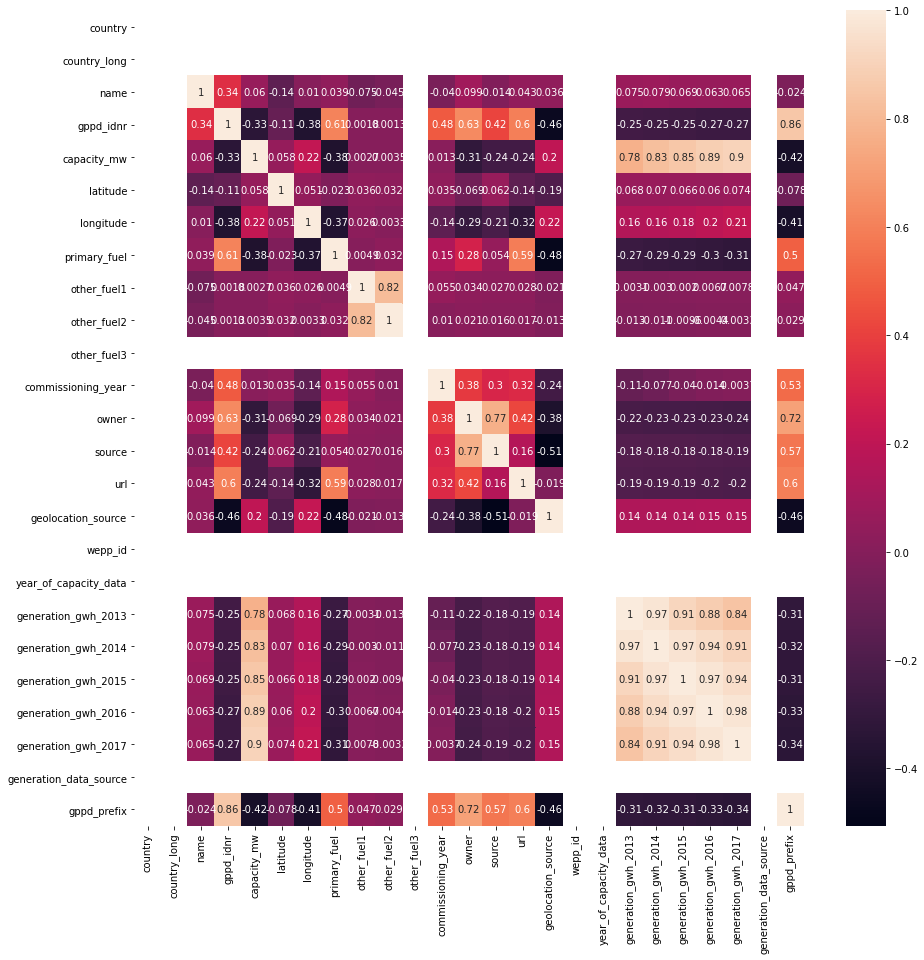

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [126]:
df.drop(['country','country_long','wepp_id','gppd_idnr','other_fuel2','other_fuel3','year_of_capacity_data','generation_data_source'],inplace=True,axis=1)

In [127]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_prefix
0,0,2.5,28.1839,73.2407,6,2,2011.0,229,109,128,1,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1,98.0,24.7663,74.6090,1,2,2013.0,258,174,173,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,39.2,21.9038,69.3732,7,2,2013.0,2,21,205,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,135.0,23.8712,91.3602,2,2,2004.0,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,58,2,0.000000,0.000000,0.994875,233.596650,865.400000,0
904,904,3.0,12.8932,78.1654,6,2,2013.0,114,77,22,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
905,905,25.5,15.2758,75.5811,7,2,2013.0,5,21,260,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
906,906,80.0,24.3500,73.7477,1,2,2013.0,91,59,82,2,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [128]:
df.drop(['name','url'],inplace=True,axis=1)

In [129]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_prefix
0,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,0.000000,0.000000,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,6,2,2013.0,114,77,0,0.000000,0.000000,0.000000,0.000000,0.000000,1
905,25.5,15.2758,75.5811,7,2,2013.0,5,21,2,0.000000,0.000000,0.000000,0.000000,0.000000,1
906,80.0,24.3500,73.7477,1,2,2013.0,91,59,2,0.000000,0.000000,0.000000,0.000000,0.000000,1


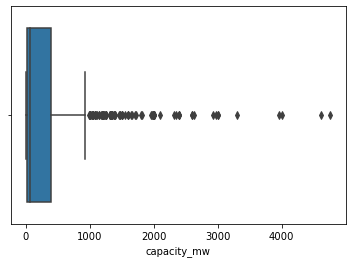

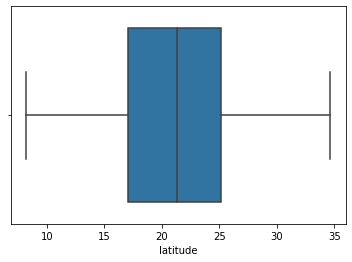

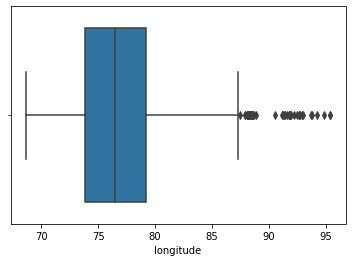

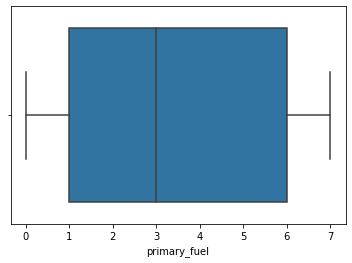

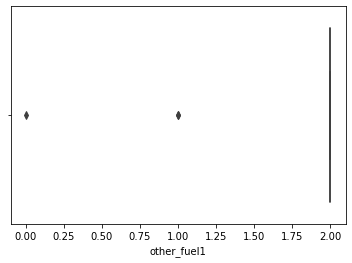

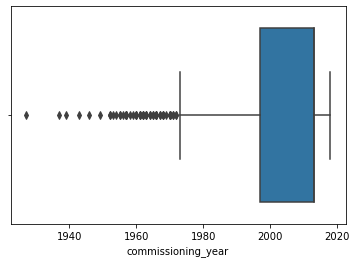

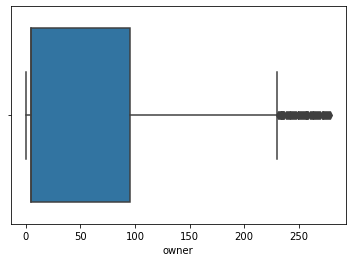

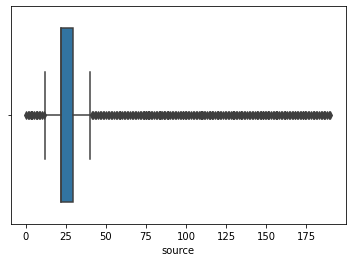

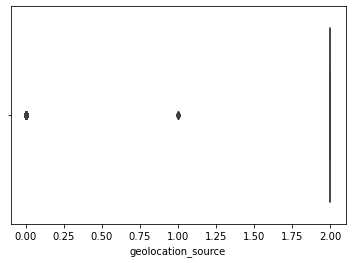

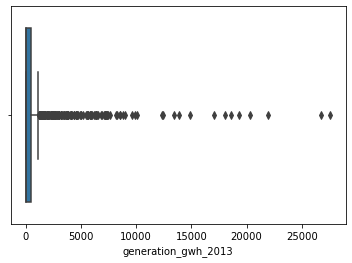

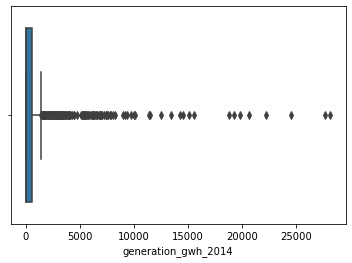

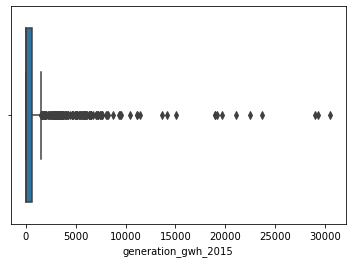

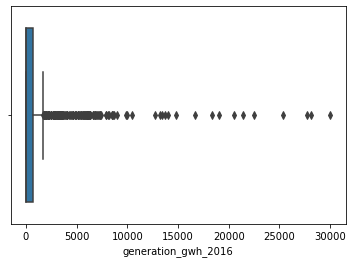

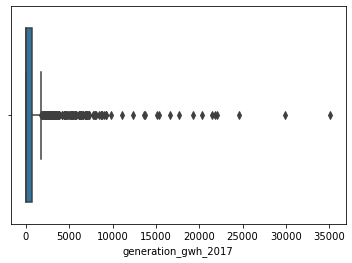

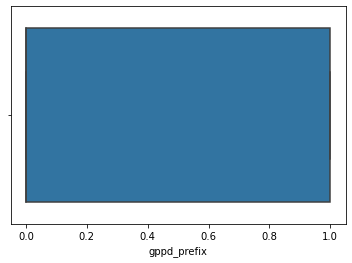

In [130]:
#checking outliers:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [131]:
#there are alot of outliers that has to be removed

In [132]:
df.skew()

capacity_mw             3.193257
latitude               -0.093609
longitude               1.118449
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year     -1.779021
owner                   1.366078
source                  1.829145
geolocation_source     -2.161710
generation_gwh_2013     5.158053
generation_gwh_2014     4.989441
generation_gwh_2015     5.264211
generation_gwh_2016     4.988235
generation_gwh_2017     4.983065
gppd_prefix             0.294357
dtype: float64

In [133]:
#data is highly skewed

In [134]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_prefix
capacity_mw,1.000000,0.057801,0.217022,-0.377783,0.002672,0.012518,-0.310560,-0.241701,0.204698,0.776258,0.827206,0.853262,0.886996,0.902431,-0.416879
latitude,0.057801,1.000000,0.050511,-0.023407,0.035502,0.035378,-0.069336,0.061728,-0.190605,0.067649,0.070407,0.066108,0.059540,0.074320,-0.078036
longitude,0.217022,0.050511,1.000000,-0.369505,0.026090,-0.138390,-0.286716,-0.211786,0.220798,0.155235,0.162076,0.175572,0.197305,0.212921,-0.410972
primary_fuel,-0.377783,-0.023407,-0.369505,1.000000,0.004902,0.145487,0.284055,0.053609,-0.482803,-0.273831,-0.286188,-0.291437,-0.304274,-0.313809,0.500012
other_fuel1,0.002672,0.035502,0.026090,0.004902,1.000000,0.054789,0.033643,0.026557,-0.021383,-0.003067,-0.002986,0.001952,0.006690,0.007839,0.046881
commissioning_year,0.012518,0.035378,-0.138390,0.145487,0.054789,1.000000,0.381615,0.301660,-0.242439,-0.108543,-0.077213,-0.039928,-0.014472,-0.003681,0.532206
owner,-0.310560,-0.069336,-0.286716,0.284055,0.033643,0.381615,1.000000,0.769652,-0.384993,-0.222499,-0.226729,-0.225801,-0.234086,-0.240500,0.717630
source,-0.241701,0.061728,-0.211786,0.053609,0.026557,0.301660,0.769652,1.000000,-0.505823,-0.175636,-0.178975,-0.178242,-0.184782,-0.189846,0.566482
geolocation_source,0.204698,-0.190605,0.220798,-0.482803,-0.021383,-0.242439,-0.384993,-0.505823,1.000000,0.141416,0.144104,0.143515,0.148781,0.152857,-0.456112
generation_gwh_2013,0.776258,0.067649,0.155235,-0.273831,-0.003067,-0.108543,-0.222499,-0.175636,0.141416,1.000000,0.972933,0.911988,0.881259,0.843310,-0.310047


In [135]:
#other_fuel1 is not having much coorelation hence deleting it

In [136]:
df.drop(['other_fuel1'],inplace=True,axis=1)

In [137]:
df.skew()

capacity_mw            3.193257
latitude              -0.093609
longitude              1.118449
primary_fuel           0.471141
commissioning_year    -1.779021
owner                  1.366078
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    5.158053
generation_gwh_2014    4.989441
generation_gwh_2015    5.264211
generation_gwh_2016    4.988235
generation_gwh_2017    4.983065
gppd_prefix            0.294357
dtype: float64

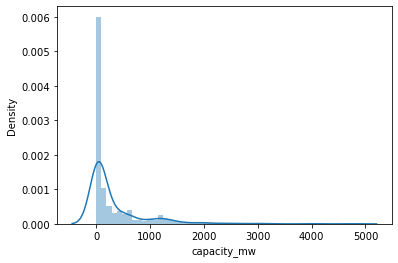

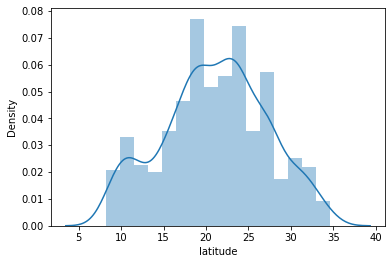

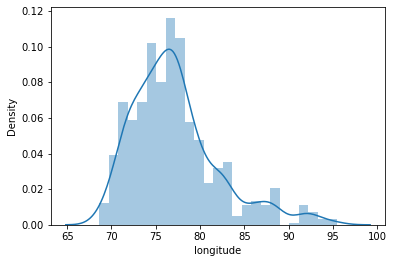

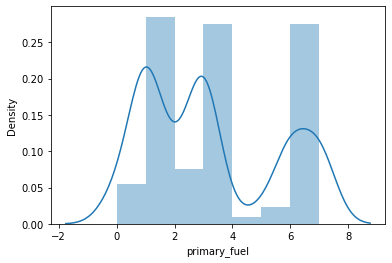

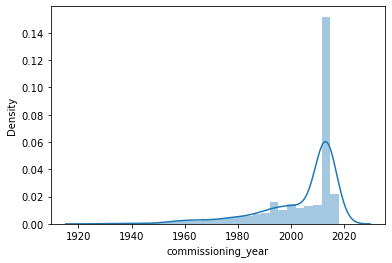

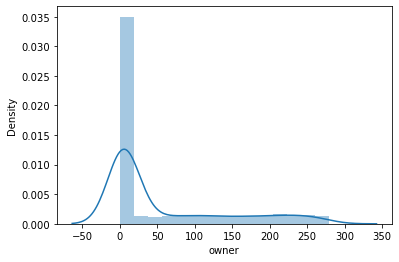

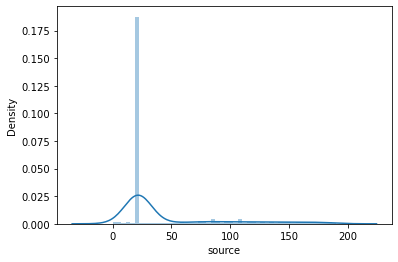

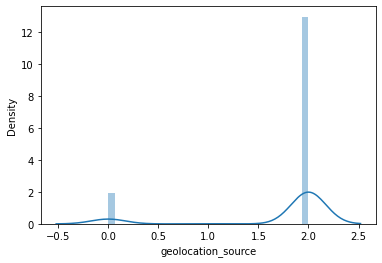

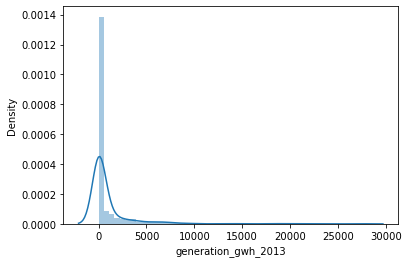

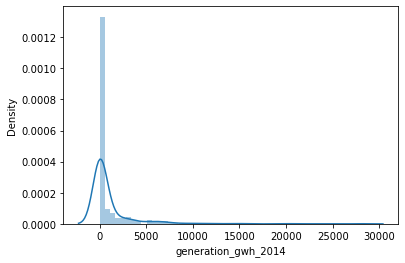

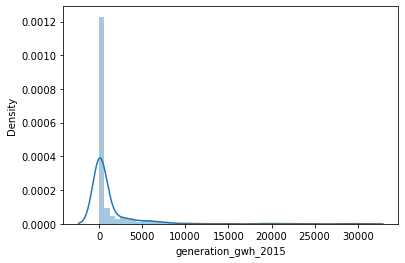

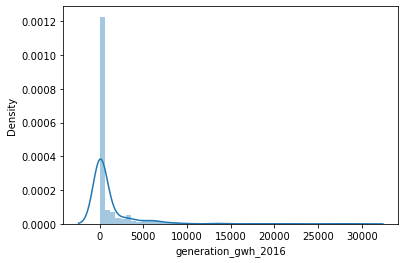

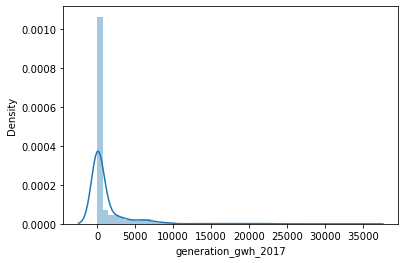

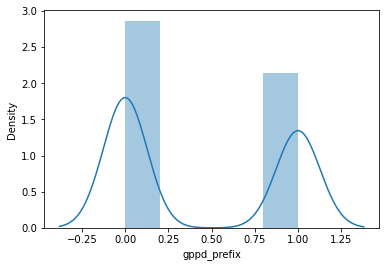

In [138]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [139]:
#skewness has to be removed

In [140]:
from scipy.stats import zscore
z=zscore(df)

In [141]:
df=df[(z<3).all(axis=1)]

In [142]:
df.shape

(857, 14)

In [143]:
loss=(908-872)/908

In [144]:
loss

0.039647577092511016

In [167]:
x=df.iloc[:,1:]
y=df.iloc[:,1]

In [168]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [169]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()
x=ms.fit_transform(x)

In [170]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [171]:
x_train=x
y_train=y
x_test=x
y_test=y
r_state=0
max_r2=0
lr=LinearRegression()
for i in range(0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(tr_x,tr_y)
    pred=lr.predict(t_x)
    if r2_score(t_y,pred)>max_r2:
        x_train=tr_x
        x_test=t_x
        y_train=tr_y
        y_test=t_y
        r_state=i
        max_r2=r2_score(t_y,pred)
print("At random state",i,"max_r2 is",max_r2)

At random state 999 max_r2 is 0.9999970657717817


In [172]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print("MSE=",mean_squared_error(y_test,pred))
    print("r2 score=",r2_score(y_test,pred))

In [173]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='r2')
    print("Cross val score",score)
    print(score.mean())

In [174]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [175]:
lr_params={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None,1,2,3]}
hypertuning(lr_params,lr)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


In [176]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=True)

In [177]:
fun(lr)
cvs(lr)

MSE= 0.00011552116714292746
r2 score= 0.9999970657717817
Cross val score [0.99999595 0.99999627 0.99999636 0.99999634 0.99999638]
0.9999962616673533


In [210]:
CVS=[99.99]
r2=[99.99]
model=['Linear Regression']

In [179]:
l=Lasso()
params_lasso={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_lasso,l)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [180]:
l=Lasso(alpha=0.001,copy_X=True,fit_intercept=True,normalize=False)
fun(l)
cvs(l)

MSE= 0.00013047650340470228
r2 score= 0.9999966859074612
Cross val score [0.99999592 0.99999679 0.99999563 0.99999627 0.9999962 ]
0.9999961622288345


In [211]:
CVS.append(99.99)
r2.append(99.99)
model.append('Lasso')

In [182]:
R=Ridge()
params_ridge={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_ridge,R)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [183]:
R=Ridge(alpha=0.001,copy_X=True,fit_intercept=True,normalize=False)
fun(R)
cvs(R)

MSE= 0.00011555873263554275
r2 score= 0.9999970648176213
Cross val score [0.99999624 0.9999964  0.99999621 0.9999962  0.99999642]
0.9999962937838992


In [212]:
CVS.append(99.99)
r2.append(99.99)
model.append('Ridge')

In [185]:
en=ElasticNet()
params_en={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_en,en)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [186]:
en=ElasticNet(alpha=0.001,copy_X=True,fit_intercept=True,normalize=False)
fun(en)
cvs(en)

MSE= 0.00014829448493970792
r2 score= 0.9999962333321842
Cross val score [0.99999587 0.99999548 0.99999652 0.9999965  0.99999504]
0.9999958833987362


In [213]:
CVS.append(99.99)
r2.append(99.99)
model.append('ElasticNet')

In [188]:
from sklearn.svm import SVR
params_svr={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3,5,7],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svr,SVR())

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': True}


In [189]:
svr=SVR(degree=1,gamma='auto',kernel='linear',shrinking=True)
fun(svr)
cvs(svr)

MSE= 0.004074473601696227
r2 score= 0.9998965087030169
Cross val score [0.99988979 0.9998938  0.99990093 0.99990186 0.99988266]
0.9998938083327371


In [214]:
CVS.append(99.98)
r2.append(99.98)
model.append('SVR')

In [191]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
params_dtr={'criterion':['mse','friedman_mse','mae'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtr,dtr)

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'best'}


In [192]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=None,min_samples_split=3,splitter='best')
fun(dtr)
cvs(dtr)

MSE= 0.007093434186046545
r2 score= 0.9998198273505385
Cross val score [0.99972784 0.9998638  0.99991048 0.99992749 0.99990316]
0.9998665522474288


In [215]:
CVS.append(99.98)
r2.append(99.98)
model.append('Decision Tree')

In [194]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [195]:
knn=KNeighborsRegressor(algorithm='brute',leaf_size=30,n_neighbors=5,weights='distance')
fun(knn)
cvs(knn)

MSE= 1.2764991832837422
r2 score= 0.9675770249141136
Cross val score [0.94080438 0.95812225 0.95806744 0.965779   0.95791566]
0.9561377462599717


In [216]:
CVS.append(95.61)
r2.append(96.76)
model.append('K Neighbor')

In [197]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
rf=RandomForestRegressor()
etr=ExtraTreeRegressor()
ada=AdaBoostRegressor()
Gd=GradientBoostingRegressor()
HGd=HistGradientBoostingRegressor()

In [198]:
params_rf={'n_estimators':[10,20,30,50,100],
           'criterion':['mae','mse'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'mae', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [199]:
rf=RandomForestRegressor(criterion='mae',max_depth=None,min_samples_split=2,n_estimators=100)
fun(rf)
cvs(rf)

MSE= 0.003489201177802092
r2 score= 0.9999113745748223
Cross val score [0.99994259 0.99994802 0.99994074 0.9999377  0.99993025]
0.9999398594530897


In [217]:
CVS.append(99.99)
r2.append(99.99)
model.append('Random Forest')

In [201]:
params_etr={'criterion':['mse','friedman_mse','mae'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etr,etr)

{'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}


In [202]:
etr=ExtraTreeRegressor(criterion='friedman_mse',max_depth=None,min_samples_split=4,splitter='best')
fun(etr)
cvs(etr)

MSE= 0.007089139878876005
r2 score= 0.9998199364255903
Cross val score [0.99990419 0.99989539 0.99980622 0.99974071 0.99987549]
0.9998444004562519


In [218]:
CVS.append(99.98)
r2.append(99.98)
model.append('Extra Tree Regressor')

In [204]:
params_ada={'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'loss':['linear', 'square', 'exponential'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 50, 'random_state': 56}


In [205]:
ada=AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=50,random_state=56)

In [206]:
fun(ada)
cvs(ada)

MSE= 0.04474994919792859
r2 score= 0.9988633549422204
Cross val score [0.99892337 0.99919183 0.99919325 0.99906451 0.9987229 ]
0.9990191722236098


In [219]:
CVS.append(99.90)
r2.append(99.88)
model.append('Ada Boost')

In [208]:
params_Gd={'n_estimators':[50,100,150],'learning_rate':[1,0.9,0.8],'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae']}
hypertuning(params_Gd,Gd)

{'criterion': 'mse', 'learning_rate': 0.8, 'loss': 'ls', 'n_estimators': 100}


In [209]:
Gd=GradientBoostingRegressor(criterion='mse',learning_rate=0.8,loss='ls',n_estimators=100)
fun(Gd)
cvs(Gd)

MSE= 0.03371323522760526
r2 score= 0.9991436865764086
Cross val score [0.99882956 0.99927516 0.99872918 0.99884323 0.99794385]
0.9987241948279918


In [222]:
CVS.append(99.87)
r2.append(99.91)
model.append('Gradient Boosting')

In [230]:
params_hgd={'loss':['least_squares','least_absolute_deviation','poisson'],'learning_rate':[0.1,0.2,0.3],'max_iter':[100,50,70],'max_leaf_nodes':[None,1,21,31,41]}
hypertuning(params_hgd,HGd)

{'learning_rate': 0.2, 'loss': 'least_squares', 'max_iter': 70, 'max_leaf_nodes': None}


In [231]:
HGd=HistGradientBoostingRegressor(learning_rate=0.2,loss='least_squares',max_iter=70,max_leaf_nodes=None)
fun(HGd)
cvs(HGd)

MSE= 0.018084010332694148
r2 score= 0.9995406676133066
Cross val score [0.99927018 0.99917344 0.99969304 0.99926958 0.99871644]
0.9992245377867359


In [232]:
r2.append(99.95)
CVS.append(99.92)

In [233]:
model.append('Hist Gradient Boosting')

In [234]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['r2']=r2
diff=[]
for i in range(0,len(r2)):
    diff.append(r2[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,r2,diff
0,Linear Regression,99.99,99.99,0.00
1,Lasso,99.99,99.99,0.00
2,Ridge,99.99,99.99,0.00
3,ElasticNet,99.99,99.99,0.00
4,SVR,99.98,99.98,0.00
5,Decision Tree,99.98,99.98,0.00
6,K Neighbor,95.61,96.76,1.15
7,Random Forest,99.99,99.99,0.00
8,Extra Tree Regressor,99.98,99.98,0.00
9,Ada Boost,99.90,99.88,-0.02


In [235]:
#According to the table above best model has to be Random Forest regressor hence saving it

In [236]:
import pickle
filename='capacity_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [237]:
predict=rf.predict(x_test)

In [238]:
output=pd.DataFrame()
output['Actual']=y_test
output['Predicted']=predict
output

,Actual,Predicted
516,18.8829,18.877766
761,12.3003,12.344786
84,19.5132,19.532078
657,18.7695,18.761877
216,32.2417,32.237888
...,...,...
870,13.6576,13.835517
479,19.0004,19.000162
18,23.0655,23.048518
457,32.0041,31.935410


In [239]:
output.to_csv('Capacity_prediction.csv')

# Classifier

In [240]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [241]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [243]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [244]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [245]:
x.shape,y.shape

((1936, 13), (1936,))

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train=x
y_train=y
x_test=x
y_test=y
r_state=0
max_acc=0
lr=LogisticRegression()
for i in range(0,2000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(tr_x,tr_y)
    pred=lr.predict(t_x)
    if accuracy_score(t_y,pred)>max_acc:
        x_train=tr_x
        x_test=t_x
        y_train=tr_y
        y_test=t_y
        r_state=i
        max_acc=accuracy_score(t_y,pred)
print("At random state",i,"max_acc is",max_acc)

At random state 1999 max_acc is 0.7835051546391752


In [247]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross val score",score)
    print(score.mean())

In [248]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [249]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print("Accuracy score",accuracy_score(y_test,pred))
    print("Confusion matrix \n",confusion_matrix(y_test,pred))
    print("Classification report \n",classification_report(y_test,pred))

In [250]:
fun(lr)
cvs(lr)

Accuracy score 0.7835051546391752
Confusion matrix 
 [[40  0  0  0  0  1  0  2]
 [ 7 20  4  1  5  0  0  2]
 [ 4  5 19  1  7  6  0  0]
 [ 0 11  4 41  2  2  0  0]
 [ 0  0  0  5 38  3  0  0]
 [ 9  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  2 48  0]
 [ 1  0  0  0  0  0  0 58]]
Classification report 
               precision    recall  f1-score   support

           0       0.66      0.93      0.77        43
           1       0.56      0.51      0.53        39
           2       0.70      0.45      0.55        42
           3       0.85      0.68      0.76        60
           4       0.73      0.83      0.78        46
           5       0.74      0.82      0.78        49
           6       1.00      0.96      0.98        50
           7       0.94      0.98      0.96        59

    accuracy                           0.78       388
   macro avg       0.77      0.77      0.76       388
weighted avg       0.79      0.78      0.78       388

Cross val score [0.70618557 0.71576227 0.73901809 0.697

In [283]:
CVS=[71.80]
acc=[78.35]
model=['Logistic Regression']

In [252]:
from sklearn.svm import SVC
params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3,5,7],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 7, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [253]:
svc=SVC(kernel='poly',degree=7,gamma='scale',shrinking=True)
fun(svc)
cvs(svc)

Accuracy score 0.8943298969072165
Confusion matrix 
 [[41  1  0  0  0  0  0  1]
 [ 5 26  5  2  0  0  0  1]
 [ 0  2 34  0  0  6  0  0]
 [ 0 10  2 48  0  0  0  0]
 [ 0  1  0  0 45  0  0  0]
 [ 0  1  0  0  0 48  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 2  0  0  0  0  0  2 55]]
Classification report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.63      0.67      0.65        39
           2       0.83      0.81      0.82        42
           3       0.96      0.80      0.87        60
           4       1.00      0.98      0.99        46
           5       0.89      0.98      0.93        49
           6       0.96      1.00      0.98        50
           7       0.96      0.93      0.95        59

    accuracy                           0.89       388
   macro avg       0.89      0.89      0.89       388
weighted avg       0.90      0.89      0.89       388

Cross val score [0.92268041 0.89922481 0.93281654 0.912

In [284]:
CVS.append(91.32)
acc.append(89.43)
model.append('SVC')

In [255]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params_dtc={'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}


In [256]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=2,splitter='best')
fun(dtc)
cvs(dtc)

Accuracy score 0.8762886597938144
Confusion matrix 
 [[39  4  0  0  0  0  0  0]
 [ 2 30  3  2  2  0  0  0]
 [ 0  4 31  1  3  3  0  0]
 [ 0  8  6 44  2  0  0  0]
 [ 0  1  1  2 41  1  0  0]
 [ 0  1  2  0  0 46  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0 59]]
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.62      0.77      0.69        39
           2       0.72      0.74      0.73        42
           3       0.90      0.73      0.81        60
           4       0.85      0.89      0.87        46
           5       0.92      0.94      0.93        49
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        59

    accuracy                           0.88       388
   macro avg       0.87      0.87      0.87       388
weighted avg       0.88      0.88      0.88       388

Cross val score [0.90979381 0.87338501 0.89405685 0.863

In [285]:
CVS.append(89.04)
acc.append(87.63)
model.append('Decision Tree')

In [258]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [259]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')
fun(knn)
cvs(knn)

Accuracy score 0.9097938144329897
Confusion matrix 
 [[42  1  0  0  0  0  0  0]
 [ 4 25  4  2  3  1  0  0]
 [ 0  0 38  0  0  4  0  0]
 [ 0  8  4 47  0  1  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  0  1  0 48  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 2  0  0  0  0  0  0 57]]
Classification report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.74      0.64      0.68        39
           2       0.83      0.90      0.86        42
           3       0.94      0.78      0.85        60
           4       0.94      1.00      0.97        46
           5       0.89      0.98      0.93        49
           6       1.00      1.00      1.00        50
           7       1.00      0.97      0.98        59

    accuracy                           0.91       388
   macro avg       0.90      0.91      0.90       388
weighted avg       0.91      0.91      0.91       388

Cross val score [0.89948454 0.9250646  0.89147287 0.886

In [286]:
CVS.append(89.62)
acc.append(90.98)
model.append('KNN')

In [261]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
rf=RandomForestClassifier()
etc=ExtraTreeClassifier()
ada=AdaBoostClassifier()
Gd=GradientBoostingClassifier()
HGd=HistGradientBoostingClassifier()

In [262]:
params_rf={'n_estimators':[10,20,30,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 30}


In [263]:
rf=RandomForestClassifier(criterion='gini',max_depth=None,min_samples_split=4,n_estimators=30)
fun(rf)
cvs(rf)

Accuracy score 0.9355670103092784
Confusion matrix 
 [[41  2  0  0  0  0  0  0]
 [ 3 29  3  1  2  0  0  1]
 [ 0  1 38  1  0  2  0  0]
 [ 0  7  2 51  0  0  0  0]
 [ 0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0 59]]
Classification report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.74      0.74      0.74        39
           2       0.88      0.90      0.89        42
           3       0.96      0.85      0.90        60
           4       0.96      1.00      0.98        46
           5       0.96      1.00      0.98        49
           6       1.00      1.00      1.00        50
           7       0.98      1.00      0.99        59

    accuracy                           0.94       388
   macro avg       0.93      0.93      0.93       388
weighted avg       0.94      0.94      0.94       388

Cross val score [0.90979381 0.91731266 0.9250646  0.909

In [287]:
CVS.append(91.79)
acc.append(93.55)
model.append('Random Forest')

In [265]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
params_etc={'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etc,etc)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}


In [267]:
etc=ExtraTreeClassifier(criterion='gini',max_depth=None,min_samples_split=4,splitter='best')
cvs(etc)
fun(etc)

Cross val score [0.84278351 0.84754522 0.85529716 0.87338501 0.84237726]
0.8522776312634861
Accuracy score 0.8711340206185567
Confusion matrix 
 [[38  2  0  0  0  2  0  1]
 [ 2 26  1  3  6  0  0  1]
 [ 0  8 32  1  0  1  0  0]
 [ 0  2  3 50  5  0  0  0]
 [ 0  2  1  1 42  0  0  0]
 [ 1  1  4  0  0 43  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 1  0  0  0  1  0  0 57]]
Classification report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.63      0.67      0.65        39
           2       0.78      0.76      0.77        42
           3       0.91      0.83      0.87        60
           4       0.78      0.91      0.84        46
           5       0.93      0.88      0.91        49
           6       1.00      1.00      1.00        50
           7       0.97      0.97      0.97        59

    accuracy                           0.87       388
   macro avg       0.86      0.86      0.86       388
weighted avg      

In [288]:
acc.append(87.11)
CVS.append(85.22)
model.append('Extra Tree Classifier')

In [269]:
params_ada={'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 50, 'random_state': 43}


In [270]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=50,random_state=43)
fun(ada)
cvs(ada)

Accuracy score 0.654639175257732
Confusion matrix 
 [[38  3  0  0  0  1  0  1]
 [ 3 25  1  1  8  0  0  1]
 [ 2  6 12 14  4  4  0  0]
 [ 0  6  7 31  4 12  0  0]
 [ 0  5  5  4 32  0  0  0]
 [ 3  2  0 11  0 33  0  0]
 [ 0  0  0  0  0  2 44  4]
 [20  0  0  0  0  0  0 39]]
Classification report 
               precision    recall  f1-score   support

           0       0.58      0.88      0.70        43
           1       0.53      0.64      0.58        39
           2       0.48      0.29      0.36        42
           3       0.51      0.52      0.51        60
           4       0.67      0.70      0.68        46
           5       0.63      0.67      0.65        49
           6       1.00      0.88      0.94        50
           7       0.87      0.66      0.75        59

    accuracy                           0.65       388
   macro avg       0.66      0.65      0.65       388
weighted avg       0.67      0.65      0.65       388

Cross val score [0.5257732  0.50904393 0.56330749 0.5943

In [289]:
acc.append(65.46)
CVS.append(54.55)
model.append('AdaBoostCLassifier')

In [290]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['acc']=acc
diff=[]
for i in range(0,len(acc)):
    diff.append(acc[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,acc,diff
0,Logistic Regression,71.80,78.35,6.55
1,SVC,91.32,89.43,-1.89
2,Decision Tree,89.04,87.63,-1.41
3,KNN,89.62,90.98,1.36
4,Random Forest,91.79,93.55,1.76
5,Extra Tree Classifier,85.22,87.11,1.89
6,AdaBoostCLassifier,54.55,65.46,10.91


In [291]:
#from above the best model is KNN

In [300]:
import pickle
filename='primary_fuel_pred.pkl'
pickle.dump(knn,open(filename,'wb'))

In [301]:
predict=knn.predict(x_test)

In [302]:
output=pd.DataFrame()
output['Actual']=y_test
output['Predicted']=predict
output

,Actual,Predicted
1246,4,4
1463,4,4
757,3,1
1298,4,4
1112,2,5
...,...,...
1917,7,7
743,1,1
750,2,2
108,1,1


In [303]:
output.to_csv('Primary_fuel_prediction.csv')